In [1]:
import numpy as np
import pandas as pd

In [12]:
labeled_df = pd.read_csv('labeled_dataset1.csv')
labeled_df

,text,label
0,Feeling upset but don’t know why? There might ...,sad
1,Sadness is a natural emotion that everyone exp...,sad
2,Feeling sad all the time for no specific reaso...,sad
3,\n\n We all have days where we feel down and s...,sad
4,"Everyone feels sad sometimes, just like everyo...",sad
...,...,...
180,"\n\nLast Updated: April 23, 2023\n\nFact Check...",neural
181,My friends were like a mirror. All I could see...,neural
182,"\n\nIn this post, learn the reasons why you c...",neural
183,“Personality begins where comparison leaves o...,neural


In [3]:
#Preprocessing

In [13]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re  
from sklearn import preprocessing

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define preprocess_data function
def preprocess_data(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words, punctuation, and numbers using regular expressions
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in punctuation and not re.match(r'^-?\d+(?:\.\d+)?$', token)]
    
    # Lemmatize the tokens 
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

# Assuming labeleddf is your DataFrame, make sure it's defined and loaded correctly
# labeleddf = pd.read_csv('your_data.csv')  # Load your DataFrame if it's stored in a file

# Check if 'label' column exists in labeleddf
if 'label' not in labeled_df.columns:
    print("Error: 'label' column not found in the DataFrame.")
else:
    # Apply preprocessing to the 'text' column
    labeled_df['text'] = labeled_df['text'].apply(preprocess_data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AHLEM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AHLEM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AHLEM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
from sklearn import preprocessing
# Label Encoding
label_encoder = preprocessing.LabelEncoder()
labeled_df['label_encoded'] = label_encoder.fit_transform(labeled_df['label'])

In [15]:
labeled_df['text']

0      feeling upset ’ know might underlying cause ho...
1      sadness natural emotion everyone experience va...
2      feeling sad time specific reason ’ always mean...
3      day feel sometimes feeling sad happen apparent...
4      everyone feel sad sometimes like everyone feel...
                             ...                        
180    last updated april fact checked article co-aut...
181    friend like mirror could see shortcoming stari...
182    post learn reason compare others way hurt ulti...
183    “ personality begin comparison leaf unique mem...
184    post ’ learn stop comparing others see time th...
Name: text, Length: 185, dtype: object

In [16]:
# Creating the Bag of Words model by applying Countvectorizer -convert textual data to numerical data


from sklearn.feature_extraction.text import CountVectorizer

# Creating the Bag of Words model by applying CountVectorizer
cv = CountVectorizer(max_features=7000, ngram_range=(1, 3))
labeleddf_cv = cv.fit_transform(labeled_df['text']).toarray()

In [17]:
labeleddf_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
# Data split

In [18]:
#X_train, X_test, y_train, y_test=data_cv,test_cv,train['N_label'],test['N_label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(labeleddf_cv, labeled_df['label_encoded'], test_size=0.25, random_state=42)

In [11]:
#Testing 

In [ ]:
# embedding_dim = 100, LSTM(units=128)

In [ ]:
# epochs=10, batch_size=10




Epoch 1/10


14/14 [==============================] - 62s 4s/step - loss: 1.1101 - accuracy: 0.2826 - val_loss: 1.0983 - val_accuracy: 0.3404
Epoch 2/10
14/14 [==============================] - 58s 4s/step - loss: 1.0982 - accuracy: 0.3478 - val_loss: 1.1014 - val_accuracy: 0.2766
Epoch 3/10
14/14 [==============================] - 61s 4s/step - loss: 1.0991 - accuracy: 0.3478 - val_loss: 1.1046 - val_accuracy: 0.2766
Epoch 4/10
14/14 [==============================] - 59s 4s/step - loss: 1.0992 - accuracy: 0.3478 - val_loss: 1.1066 - val_accuracy: 0.2766
Epoch 5/10
14/14 [==============================] - 58s 4s/step - loss: 1.0988 - accuracy: 0.3478 - val_loss: 1.1040 - val_accuracy: 0.2766
Epoch 6/10
14/14 [==============================] - 58s 4s/step - loss: 1.0988 - accuracy: 0.3043 - val_loss: 1.1011 - val_accuracy: 0.3404
Epoch 7/10
14/14 [==============================] - 58s 4s/step - loss: 1.0987 - accuracy: 0.2971 - val_loss: 1.1004 - val_accuracy: 0.2766
Epoch 8/10
14/1

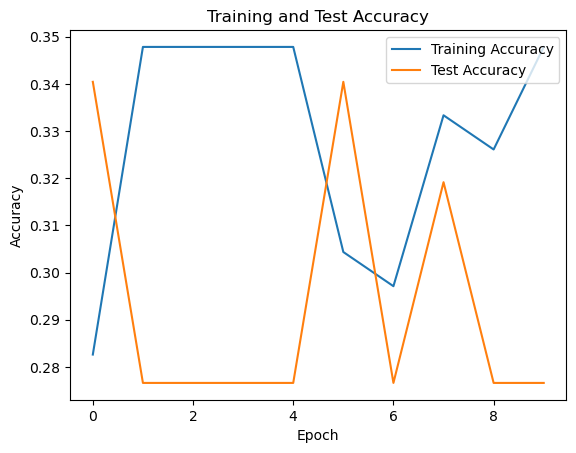

5/5 [==============================] - 4s 742ms/step - loss: 1.0957 - accuracy: 0.3478
Training Accuracy: 34.78%
2/2 [==============================] - 2s 660ms/step - loss: 1.1007 - accuracy: 0.2766
Test Accuracy: 27.66%


In [19]:
# Create a Tokenizer object
from keras.preprocessing.text import Tokenizer 
from keras.models import Sequential  # Import Sequential class
from keras.layers import Embedding, LSTM, Dense  
import matplotlib.pyplot as plt
tokenizer = Tokenizer()
tokenizer.fit_on_texts(labeled_df['text'])

# Calculate vocab_size (total number of unique words in your dataset)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token (if used)

# Assuming all sequences have the same length after preprocessing
max_sequence_length = X_train.shape[1]  # Use the shape of X_train to determine the max sequence length

# Define the dimensionality of word embeddings
embedding_dim = 100  # Example dimensionality, choose based on your requirements

# Define the architecture of your deep learning model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(units=128),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Get the history of training and test accuracy from model training
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the training data
_, accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%' % (accuracy * 100))
# Evaluate the model on the test data
_, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))

In [ ]:
# epochs=10, batch_size=20

Epoch 1/10
7/7 [==============================] - 34s 5s/step - loss: 1.1053 - accuracy: 0.2754 - val_loss: 1.1021 - val_accuracy: 0.3404
Epoch 2/10
7/7 [==============================] - 33s 5s/step - loss: 1.0999 - accuracy: 0.3043 - val_loss: 1.1038 - val_accuracy: 0.2766
Epoch 3/10
7/7 [==============================] - 33s 5s/step - loss: 1.0985 - accuracy: 0.3478 - val_loss: 1.1018 - val_accuracy: 0.2766
Epoch 4/10
7/7 [==============================] - 34s 5s/step - loss: 1.0983 - accuracy: 0.3478 - val_loss: 1.1019 - val_accuracy: 0.2766
Epoch 5/10
7/7 [==============================] - 34s 5s/step - loss: 1.0980 - accuracy: 0.3478 - val_loss: 1.1023 - val_accuracy: 0.2766
Epoch 6/10
7/7 [==============================] - 34s 5s/step - loss: 1.0983 - accuracy: 0.3478 - val_loss: 1.1039 - val_accuracy: 0.2766
Epoch 7/10
7/7 [==============================] - 34s 5s/step - loss: 1.0973 - accuracy: 0.3478 - val_loss: 1.1042 - val_accuracy: 0.2766
Epoch 8/10
7/7 [==================

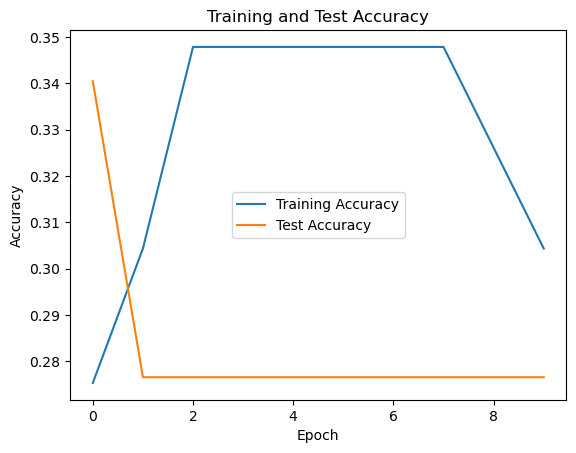

5/5 [==============================] - 4s 806ms/step - loss: 1.0948 - accuracy: 0.3478
Training Accuracy: 34.78%
2/2 [==============================] - 1s 531ms/step - loss: 1.1005 - accuracy: 0.2766
Test Accuracy: 27.66%


In [20]:
# Create a Tokenizer object
from keras.preprocessing.text import Tokenizer 
from keras.models import Sequential  # Import Sequential class
from keras.layers import Embedding, LSTM, Dense  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(labeled_df['text'])

# Calculate vocab_size (total number of unique words in your dataset)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token (if used)

# Assuming all sequences have the same length after preprocessing
max_sequence_length = X_train.shape[1]  # Use the shape of X_train to determine the max sequence length

# Define the dimensionality of word embeddings
embedding_dim = 100  # Example dimensionality, choose based on your requirements

# Define the architecture of your deep learning model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(units=128),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Get the history of training and test accuracy from model training
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_test, y_test))

# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the training data
_, accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%' % (accuracy * 100))
# Evaluate the model on the test data
_, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))

In [ ]:
# embedding_dim = 50, LSTM(units=128)

In [ ]:
# epochs=10, batch_size=10

Epoch 1/10
14/14 [==============================] - 56s 4s/step - loss: 1.1050 - accuracy: 0.2754 - val_loss: 1.0983 - val_accuracy: 0.3404
Epoch 2/10
14/14 [==============================] - 59s 4s/step - loss: 1.0993 - accuracy: 0.3406 - val_loss: 1.1010 - val_accuracy: 0.3404
Epoch 3/10
14/14 [==============================] - 59s 4s/step - loss: 1.0988 - accuracy: 0.2681 - val_loss: 1.1035 - val_accuracy: 0.2766
Epoch 4/10
14/14 [==============================] - 59s 4s/step - loss: 1.1001 - accuracy: 0.3478 - val_loss: 1.1064 - val_accuracy: 0.2766
Epoch 5/10
14/14 [==============================] - 59s 4s/step - loss: 1.0996 - accuracy: 0.3478 - val_loss: 1.1005 - val_accuracy: 0.2766
Epoch 6/10
14/14 [==============================] - 59s 4s/step - loss: 1.0986 - accuracy: 0.2754 - val_loss: 1.1004 - val_accuracy: 0.3404
Epoch 7/10
14/14 [==============================] - 59s 4s/step - loss: 1.0978 - accuracy: 0.3043 - val_loss: 1.1015 - val_accuracy: 0.2766
Epoch 8/10
14/14 [==

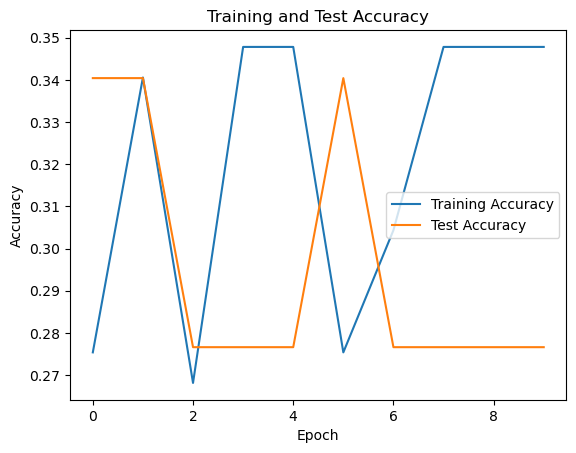

5/5 [==============================] - 4s 814ms/step - loss: 1.0960 - accuracy: 0.3478
Training Accuracy: 34.78%
2/2 [==============================] - 2s 614ms/step - loss: 1.1031 - accuracy: 0.2766
Test Accuracy: 27.66%


In [21]:
# Create a Tokenizer object
from keras.preprocessing.text import Tokenizer 
from keras.models import Sequential  # Import Sequential class
from keras.layers import Embedding, LSTM, Dense  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(labeled_df['text'])

# Calculate vocab_size (total number of unique words in your dataset)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token (if used)

# Assuming all sequences have the same length after preprocessing
max_sequence_length = X_train.shape[1]  # Use the shape of X_train to determine the max sequence length

# Define the dimensionality of word embeddings
embedding_dim = 50 # Example dimensionality, choose based on your requirements

# Define the architecture of your deep learning model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(units=128),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import matplotlib.pyplot as plt

# Get the history of training and test accuracy from model training
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the training data
_, training_accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%' % (training_accuracy * 100))
# Evaluate the model on the test data
_, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))

In [ ]:
# epochs=10, batch_size=20

Epoch 1/10
7/7 [==============================] - 35s 5s/step - loss: 1.1047 - accuracy: 0.3188 - val_loss: 1.1053 - val_accuracy: 0.2766
Epoch 2/10
7/7 [==============================] - 35s 5s/step - loss: 1.0992 - accuracy: 0.3478 - val_loss: 1.1041 - val_accuracy: 0.2766
Epoch 3/10
7/7 [==============================] - 34s 5s/step - loss: 1.0994 - accuracy: 0.3478 - val_loss: 1.1007 - val_accuracy: 0.2766
Epoch 4/10
7/7 [==============================] - 34s 5s/step - loss: 1.0984 - accuracy: 0.3261 - val_loss: 1.1008 - val_accuracy: 0.3404
Epoch 5/10
7/7 [==============================] - 34s 5s/step - loss: 1.0983 - accuracy: 0.3478 - val_loss: 1.1020 - val_accuracy: 0.3617
Epoch 6/10
7/7 [==============================] - 34s 5s/step - loss: 1.0998 - accuracy: 0.3116 - val_loss: 1.1023 - val_accuracy: 0.2766
Epoch 7/10
7/7 [==============================] - 34s 5s/step - loss: 1.0984 - accuracy: 0.3478 - val_loss: 1.1027 - val_accuracy: 0.2766
Epoch 8/10
7/7 [==================

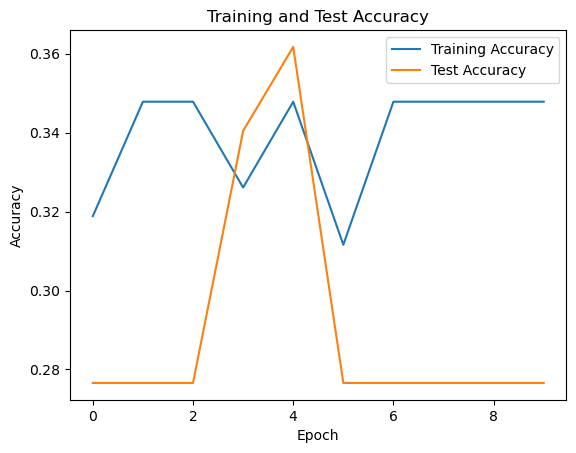

5/5 [==============================] - 4s 778ms/step - loss: 1.0972 - accuracy: 0.3478
Training Accuracy: 34.78%
2/2 [==============================] - 1s 557ms/step - loss: 1.1019 - accuracy: 0.2766
Test Accuracy: 27.66%


In [22]:
# Create a Tokenizer object
from keras.preprocessing.text import Tokenizer 
from keras.models import Sequential  # Import Sequential class
from keras.layers import Embedding, LSTM, Dense  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(labeled_df['text'])

# Calculate vocab_size (total number of unique words in your dataset)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token (if used)

# Assuming all sequences have the same length after preprocessing
max_sequence_length = X_train.shape[1]  # Use the shape of X_train to determine the max sequence length

# Define the dimensionality of word embeddings
embedding_dim = 50 # Example dimensionality, choose based on your requirements

# Define the architecture of your deep learning model
model1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(units=128),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import matplotlib.pyplot as plt

# Get the history of training and test accuracy from model training
history = model1.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_test, y_test))

# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the training data
_, training_accuracy = model1.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%' % (training_accuracy * 100))
# Evaluate the model on the test data
_, test_accuracy = model1.evaluate(X_test, y_test)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))

In [ ]:
# embedding_dim = 50, LSTM(units=256)

In [ ]:
# epochs=10, batch_size=10

Epoch 1/10
14/14 [==============================] - 73s 5s/step - loss: 1.1045 - accuracy: 0.3406 - val_loss: 1.1054 - val_accuracy: 0.2766
Epoch 2/10
14/14 [==============================] - 74s 5s/step - loss: 1.0989 - accuracy: 0.3478 - val_loss: 1.1001 - val_accuracy: 0.2766
Epoch 3/10
14/14 [==============================] - 74s 5s/step - loss: 1.0995 - accuracy: 0.3478 - val_loss: 1.0999 - val_accuracy: 0.2766
Epoch 4/10
14/14 [==============================] - 74s 5s/step - loss: 1.0987 - accuracy: 0.3478 - val_loss: 1.1023 - val_accuracy: 0.2766
Epoch 5/10
14/14 [==============================] - 74s 5s/step - loss: 1.1001 - accuracy: 0.3478 - val_loss: 1.1044 - val_accuracy: 0.2766
Epoch 6/10
14/14 [==============================] - 75s 5s/step - loss: 1.0982 - accuracy: 0.3478 - val_loss: 1.1022 - val_accuracy: 0.2766
Epoch 7/10
14/14 [==============================] - 74s 5s/step - loss: 1.0980 - accuracy: 0.3478 - val_loss: 1.1013 - val_accuracy: 0.2766
Epoch 8/10
14/14 [==

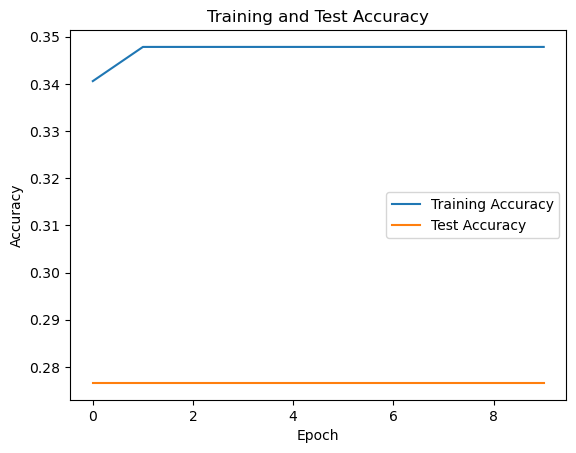

5/5 [==============================] - 10s 2s/step - loss: 1.0967 - accuracy: 0.3478
Training Accuracy: 34.78%
2/2 [==============================] - 3s 1s/step - loss: 1.1055 - accuracy: 0.2766
Test Accuracy: 27.66%


In [23]:
# Create a Tokenizer object
from keras.preprocessing.text import Tokenizer 
from keras.models import Sequential  # Import Sequential class
from keras.layers import Embedding, LSTM, Dense  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(labeled_df['text'])

# Calculate vocab_size (total number of unique words in your dataset)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token (if used)

# Assuming all sequences have the same length after preprocessing
max_sequence_length = X_train.shape[1]  # Use the shape of X_train to determine the max sequence length

# Define the dimensionality of word embeddings
embedding_dim = 50 # Example dimensionality, choose based on your requirements

# Define the architecture of your deep learning model
model2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(units=256),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import matplotlib.pyplot as plt

# Get the history of training and test accuracy from model training
history = model2.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the training data
_, training_accuracy = model2.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%' % (training_accuracy * 100))
# Evaluate the model on the test data
_, test_accuracy = model2.evaluate(X_test, y_test)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))

In [ ]:
# epochs=10, batch_size=20

Epoch 1/10
7/7 [==============================] - 492s 70s/step - loss: 1.1090 - accuracy: 0.3188 - val_loss: 1.0948 - val_accuracy: 0.3830
Epoch 2/10
7/7 [==============================] - 499s 70s/step - loss: 1.1020 - accuracy: 0.2971 - val_loss: 1.1020 - val_accuracy: 0.3404
Epoch 3/10
7/7 [==============================] - 521s 75s/step - loss: 1.0984 - accuracy: 0.3261 - val_loss: 1.1024 - val_accuracy: 0.2766
Epoch 4/10
7/7 [==============================] - 428s 60s/step - loss: 1.0981 - accuracy: 0.3478 - val_loss: 1.1023 - val_accuracy: 0.2766
Epoch 5/10
7/7 [==============================] - 427s 59s/step - loss: 1.0989 - accuracy: 0.3478 - val_loss: 1.1032 - val_accuracy: 0.2766
Epoch 6/10
7/7 [==============================] - 440s 62s/step - loss: 1.0980 - accuracy: 0.3478 - val_loss: 1.1037 - val_accuracy: 0.2766
Epoch 7/10
7/7 [==============================] - 420s 59s/step - loss: 1.0988 - accuracy: 0.3478 - val_loss: 1.1025 - val_accuracy: 0.2766
Epoch 8/10
7/7 [====

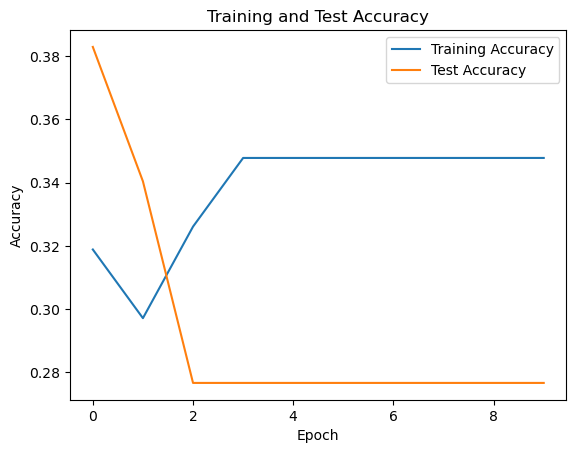

5/5 [==============================] - 8s 2s/step - loss: 1.0970 - accuracy: 0.3478
Training Accuracy: 34.78%
2/2 [==============================] - 3s 922ms/step - loss: 1.1028 - accuracy: 0.2766
Test Accuracy: 27.66%


In [24]:
# Create a Tokenizer object
from keras.preprocessing.text import Tokenizer 
from keras.models import Sequential  # Import Sequential class
from keras.layers import Embedding, LSTM, Dense  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(labeled_df['text'])

# Calculate vocab_size (total number of unique words in your dataset)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token (if used)

# Assuming all sequences have the same length after preprocessing
max_sequence_length = X_train.shape[1]  # Use the shape of X_train to determine the max sequence length

# Define the dimensionality of word embeddings
embedding_dim = 50 # Example dimensionality, choose based on your requirements

# Define the architecture of your deep learning model
model3 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(units=256),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import matplotlib.pyplot as plt

# Get the history of training and test accuracy from model training
history = model3.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_test, y_test))

# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the training data
_, training_accuracy = model3.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%' % (training_accuracy * 100))
# Evaluate the model on the test data
_, test_accuracy = model3.evaluate(X_test, y_test)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))

In [ ]:
# embedding_dim = 50, LSTM(units=128), early_stopping

In [ ]:
# epochs=10, batch_size=10

Epoch 1/10
7/7 [==============================] - 169s 21s/step - loss: 1.1064 - accuracy: 0.3043 - val_loss: 1.0931 - val_accuracy: 0.4583
Epoch 2/10
7/7 [==============================] - 135s 20s/step - loss: 1.1063 - accuracy: 0.2609 - val_loss: 1.1075 - val_accuracy: 0.2500
Epoch 3/10
7/7 [==============================] - 141s 20s/step - loss: 1.1025 - accuracy: 0.3333 - val_loss: 1.1119 - val_accuracy: 0.2500
Epoch 4/10
7/7 [==============================] - 139s 20s/step - loss: 1.0968 - accuracy: 0.3623 - val_loss: 1.1114 - val_accuracy: 0.2500


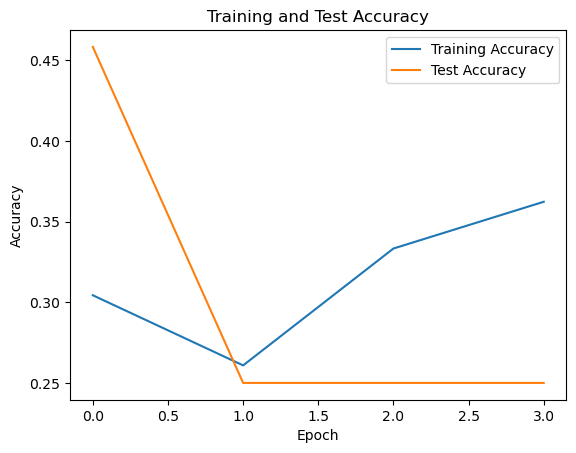

3/3 [==============================] - 7s 2s/step - loss: 1.1017 - accuracy: 0.3043
Training Accuracy: 30.43%
1/1 [==============================] - 3s 3s/step - loss: 1.0931 - accuracy: 0.4583
Test Accuracy: 45.83%


In [31]:
from keras.callbacks import EarlyStopping
from keras.layers import SpatialDropout1D
# Create a Tokenizer object
from keras.preprocessing.text import Tokenizer 
from keras.models import Sequential  # Import Sequential class
from keras.layers import Embedding, LSTM, Dense  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(labeled_df['text'])

# Calculate vocab_size (total number of unique words in your dataset)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token (if used)

# Assuming all sequences have the same length after preprocessing
max_sequence_length = X_train.shape[1]  # Use the shape of X_train to determine the max sequence length

# Define the dimensionality of word embeddings
embedding_dim = 50  # Example dimensionality, choose based on your requirements

# Define the architecture of your deep learning model with adjustments
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, 
              embeddings_initializer="uniform", trainable=True),  # Use pre-trained embeddings if available
    SpatialDropout1D(0.2),  # Apply dropout to the embedding layer
    LSTM(units=128, dropout=0.2, recurrent_dropout=0.2),  # Increase LSTM units and apply dropout
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

# Compile the model with adjustments
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model on the training data with adjustments
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

import matplotlib.pyplot as plt

# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the training data
_, training_accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%' % (training_accuracy * 100))
# Evaluate the model on the test data
_, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))

In [ ]:
# epochs=10, batch_size=20

Epoch 1/10
4/4 [==============================] - 147s 30s/step - loss: 1.1001 - accuracy: 0.3188 - val_loss: 1.1108 - val_accuracy: 0.2500
Epoch 2/10
4/4 [==============================] - 99s 25s/step - loss: 1.0967 - accuracy: 0.3623 - val_loss: 1.1108 - val_accuracy: 0.2500
Epoch 3/10
4/4 [==============================] - 102s 26s/step - loss: 1.1003 - accuracy: 0.3623 - val_loss: 1.1149 - val_accuracy: 0.2500
Epoch 4/10
4/4 [==============================] - 101s 25s/step - loss: 1.0943 - accuracy: 0.3623 - val_loss: 1.1207 - val_accuracy: 0.2500


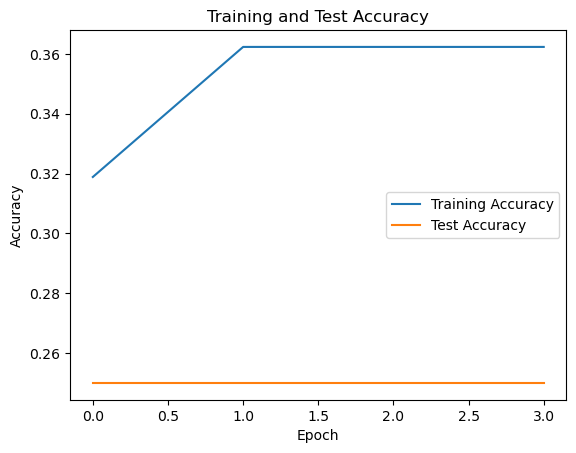

3/3 [==============================] - 6s 2s/step - loss: 1.0964 - accuracy: 0.3623
Training Accuracy: 36.23%
1/1 [==============================] - 6s 6s/step - loss: 1.1108 - accuracy: 0.2500
Test Accuracy: 25.00%


In [32]:
from keras.callbacks import EarlyStopping
from keras.layers import SpatialDropout1D
# Create a Tokenizer object
from keras.preprocessing.text import Tokenizer 
from keras.models import Sequential  # Import Sequential class
from keras.layers import Embedding, LSTM, Dense  
tokenizer = Tokenizer()
tokenizer.fit_on_texts(labeled_df['text'])

# Calculate vocab_size (total number of unique words in your dataset)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token (if used)

# Assuming all sequences have the same length after preprocessing
max_sequence_length = X_train.shape[1]  # Use the shape of X_train to determine the max sequence length

# Define the dimensionality of word embeddings
embedding_dim = 50  # Example dimensionality, choose based on your requirements

# Define the architecture of your deep learning model with adjustments
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, 
              embeddings_initializer="uniform", trainable=True),  # Use pre-trained embeddings if available
    SpatialDropout1D(0.2),  # Apply dropout to the embedding layer
    LSTM(units=128, dropout=0.2, recurrent_dropout=0.2),  # Increase LSTM units and apply dropout
    Dense(units=len(label_encoder.classes_), activation='softmax')
])

# Compile the model with adjustments
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model on the training data with adjustments
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

import matplotlib.pyplot as plt

# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the training data
_, training_accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%' % (training_accuracy * 100))
# Evaluate the model on the test data
_, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: %.2f%%' % (test_accuracy * 100))